# Edge Detection

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

In [3]:
def convolve(im, k):
    return cv2.filter2D(im, -1, k)

### Part 1

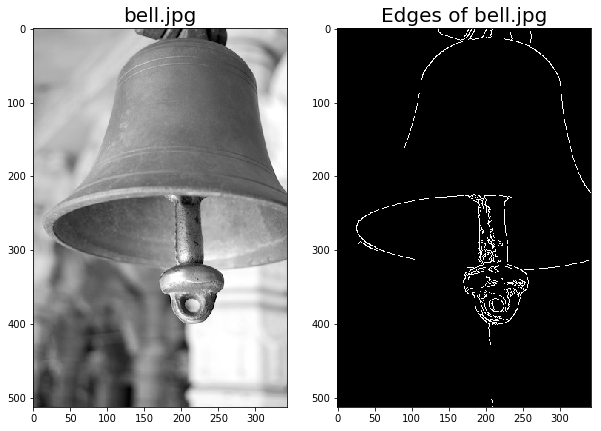

In [4]:
images = []
subtitles = []
img = cv2.imread('../input_data/bell.jpg', cv2.IMREAD_GRAYSCALE)
output = cv2.Canny(img, 100, 320)
images.append(img)
images.append(output)
subtitles.append('bell.jpg')
subtitles.append('Edges of bell.jpg')
display_images(images, 1, 2, (10, 10), 'title', subtitles)

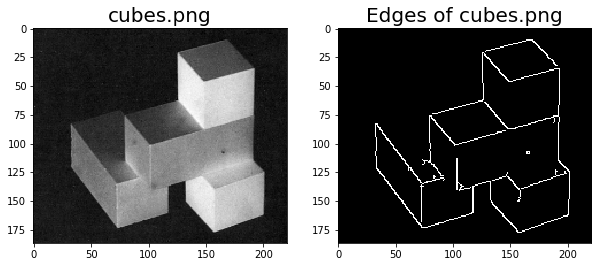

In [5]:
images = []
subtitles = []
img = cv2.imread('../input_data/cubes.png', cv2.IMREAD_GRAYSCALE)
output = cv2.Canny(img, 60, 150)
images.append(img)
images.append(output)
subtitles.append('cubes.png')
subtitles.append('Edges of cubes.png')
display_images(images, 1, 2, (10, 10), 'title', subtitles)

### Part 2

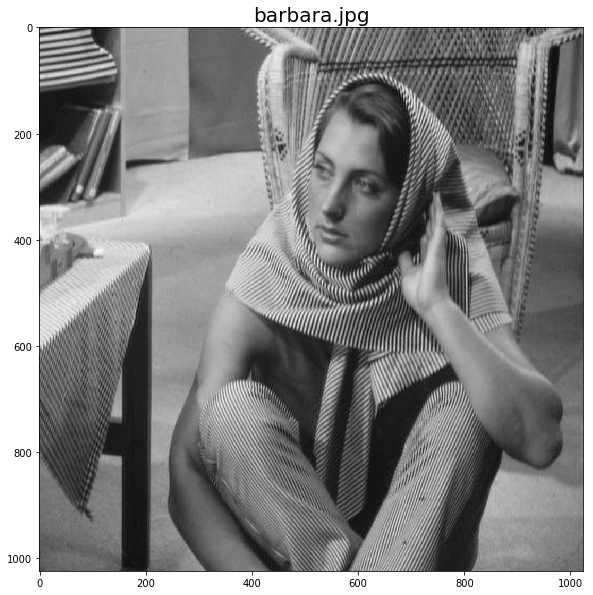

In [6]:
images = []
subtitles = []
img = cv2.imread('../input_data/barbara.jpg', cv2.IMREAD_GRAYSCALE)
images.append(img)
subtitles.append('barbara.jpg')
display_images(images, 1, 1, (10, 10), 'title', subtitles)

In [7]:
# Prewitt
images = []
subtitles = []

kernelx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) 
outputx = convolve(img, kernelx)
images.append(outputx)
subtitles.append('Prewitt X')

kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]) 
outputy = convolve(img, kernely)
images.append(outputy)
subtitles.append('Prewitt Y')

outputx = outputx.astype(np.float64)
outputy = outputy.astype(np.float64)

output = np.sqrt(outputx * outputx + outputy * outputy)
output = output.astype(np.uint8)
images.append(output)
subtitles.append('Prewitt')

In [8]:
# Sobel
kernelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
outputx = convolve(img, kernelx)
images.append(outputx)
subtitles.append('Sobel X')

kernely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) 
outputy = convolve(img, kernely)
images.append(outputy)
subtitles.append('Sobel Y')

outputx = outputx.astype(np.float64)
outputy = outputy.astype(np.float64)

output = np.sqrt(outputx * outputx + outputy * outputy)
output = output.astype(np.uint8)
images.append(output)
subtitles.append('Sobel')

In [9]:
# Roberts
kernelx = np.array([[0, 1], [-1, 0]]) 
outputx = convolve(img, kernelx)
images.append(outputx)
subtitles.append('Roberts X')

kernely = np.array([[1, 0], [0, -1]]) 
outputy = convolve(img, kernely)
images.append(outputy)
subtitles.append('Roberts Y')

outputx = outputx.astype(np.float64)
outputy = outputy.astype(np.float64)

output = np.sqrt(outputx * outputx + outputy * outputy)
output = output.astype(np.uint8)
images.append(output)
subtitles.append('Roberts')

In [10]:
# Laplacian
kernel1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) 
output1 = convolve(img, kernel1)
images.append(output1)
subtitles.append('Laplacian(-4 in center)')

kernel2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]]) 
output2 = convolve(img, kernel2)
images.append(output2)
subtitles.append('Laplacian(-8 in center)')

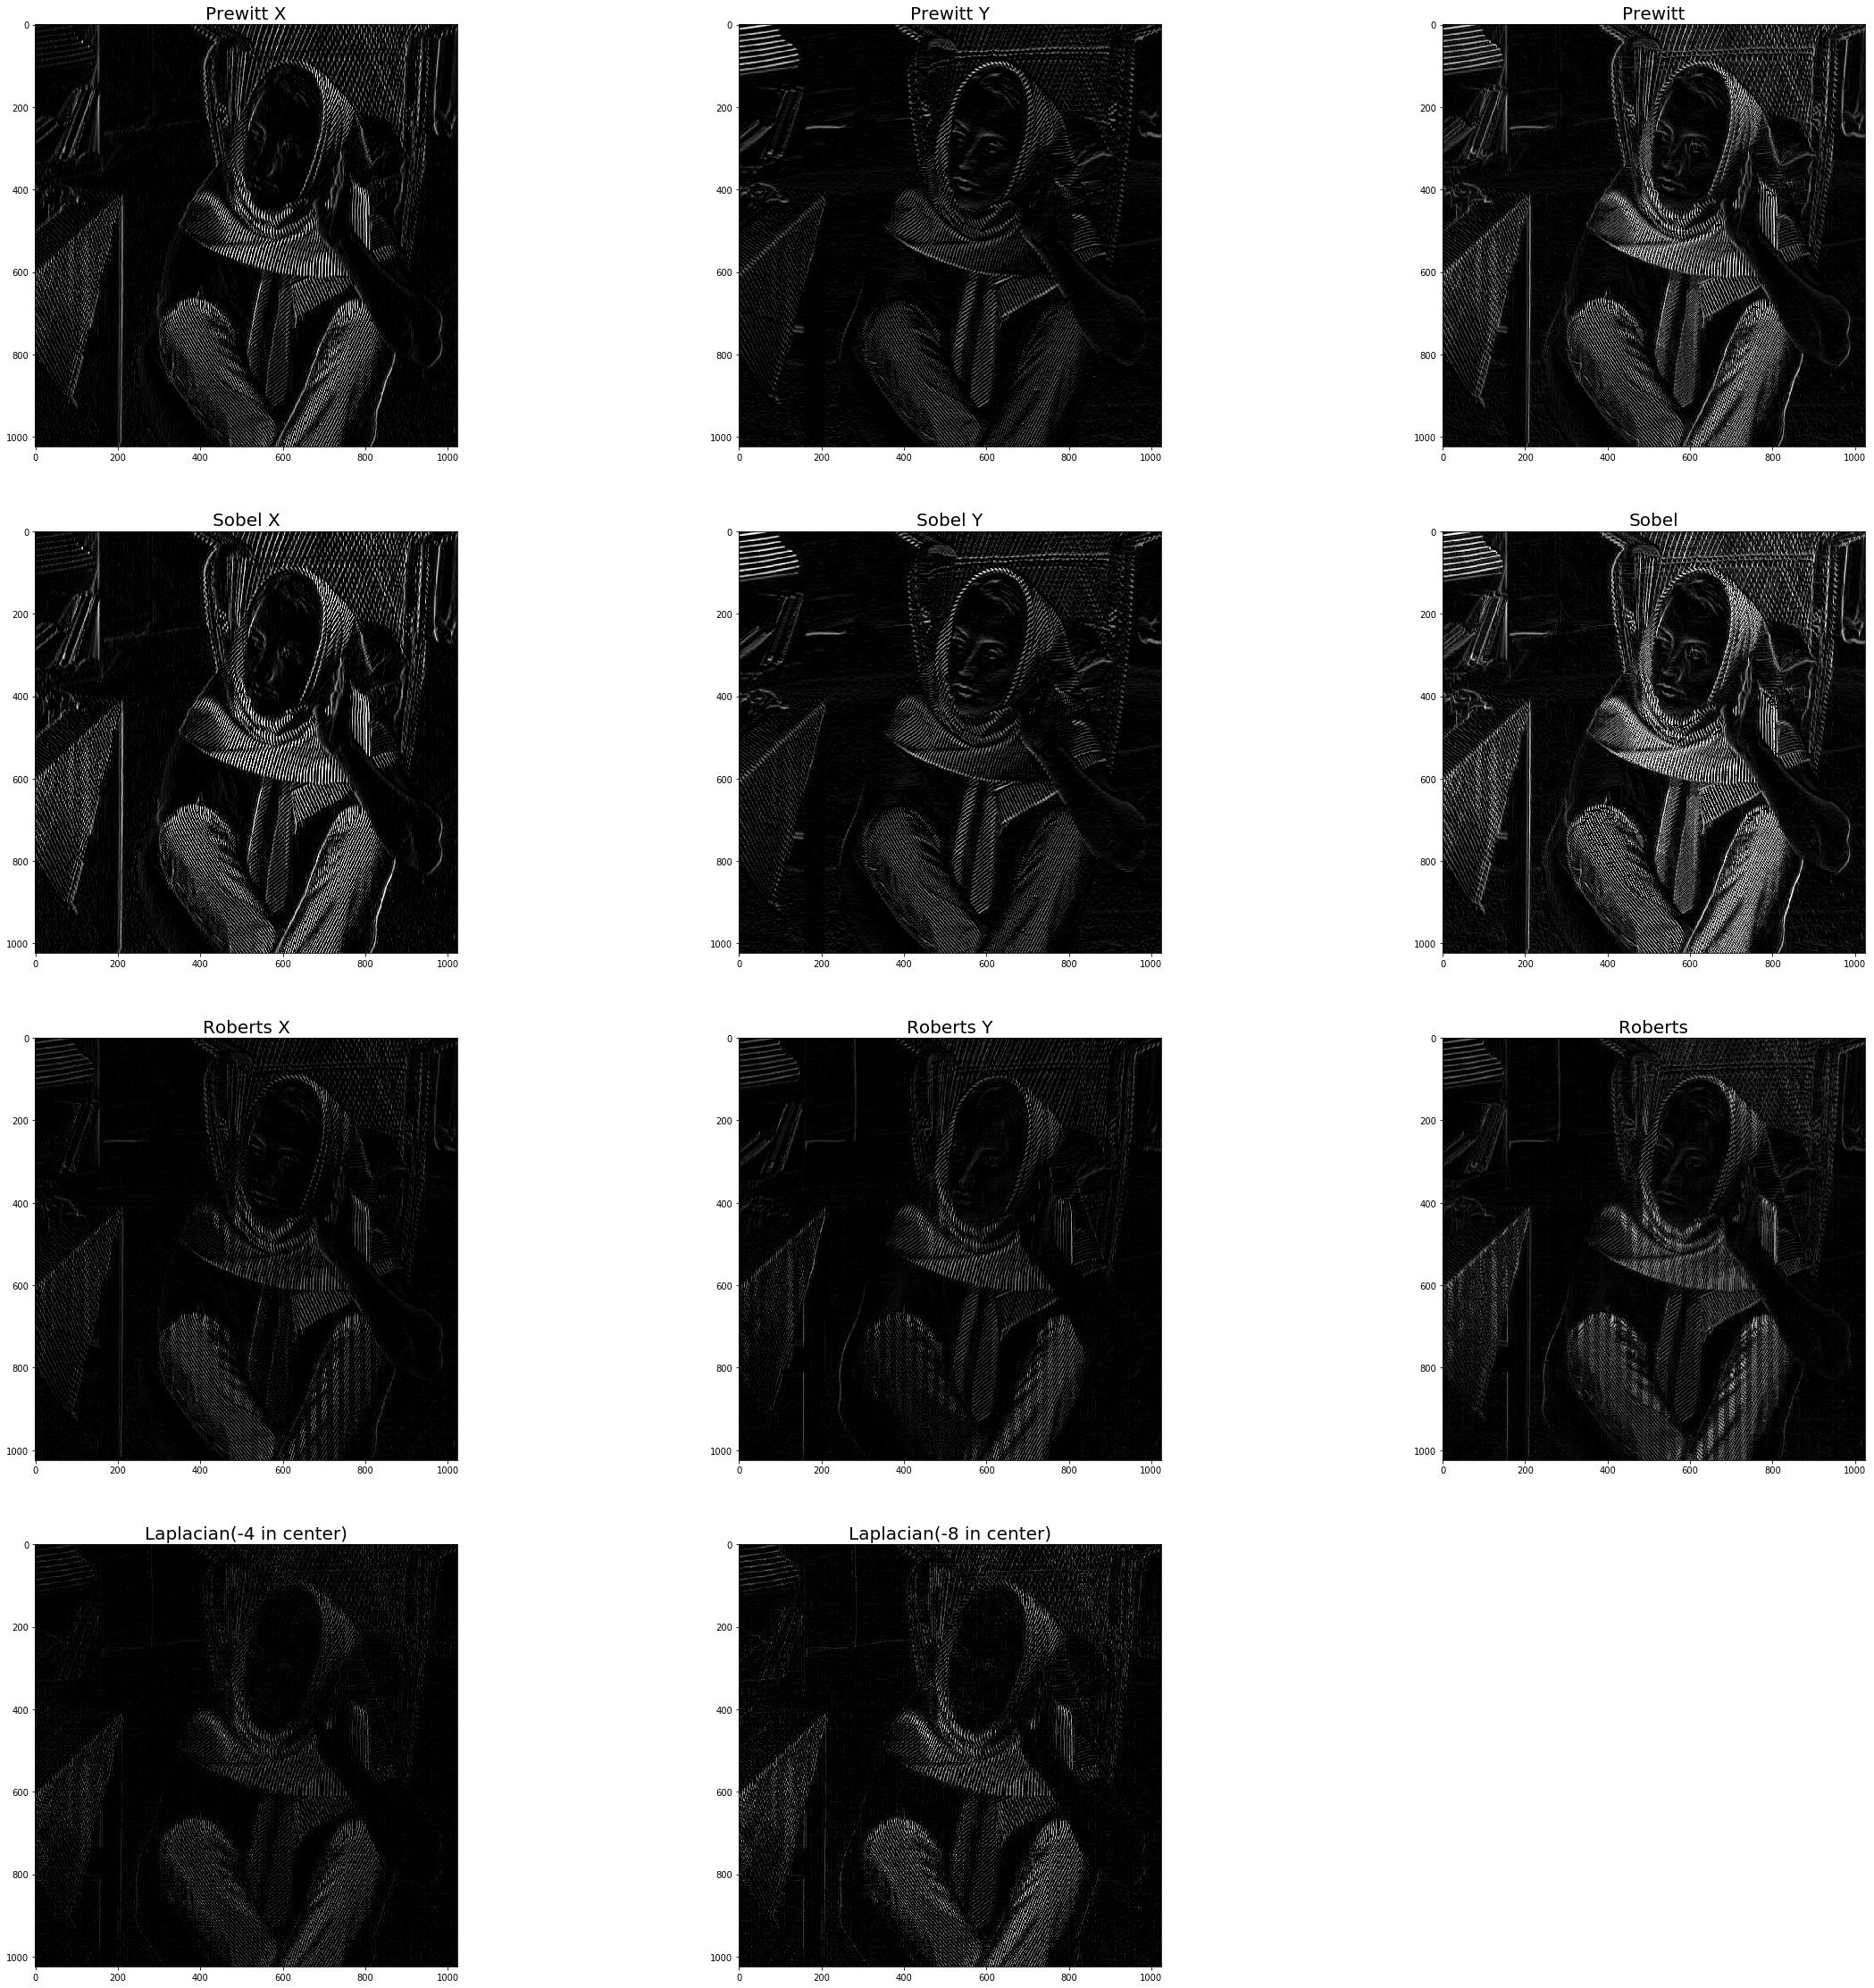

In [11]:
display_images(images, 4, 3, (40, 40), 'title', subtitles)

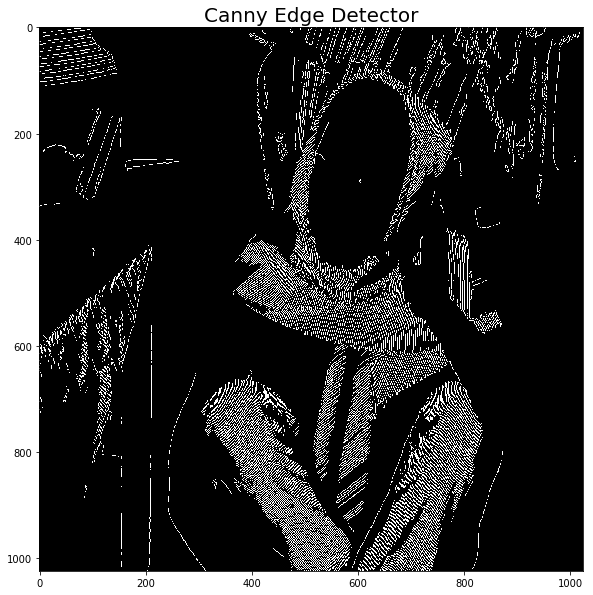

In [12]:
images = []
subtitles = []
output = cv2.Canny(img, 100, 250)
images.append(output)
subtitles.append('Canny Edge Detector')
display_images(images, 1, 1, (10, 10), 'title', subtitles)

### Part 3

In [13]:
# Helper Function required to add Gaussian Noise to an image
def noisy(image):
    image = image.astype()
    row,col= image.shape
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = image + gauss
    return noisy.astype(np.uint8)

In [14]:
images = []
subtitles = []
img = noisy(cv2.imread('../input_data/barbara.jpg', cv2.IMREAD_GRAYSCALE))
images.append(img)
subtitles.append('barbara.jpg')
display_images(images, 1, 1, (10, 10), 'title', subtitles)

TypeError: Required argument 'dtype' (pos 1) not found